In [2]:
import pandas as pd

df = pd.read_excel("../data/dados_frutas.xlsx")
df


,Arredondada,Suculenta,Vermelha,Doce,Fruta
0,0,1,1,1,Morango
1,1,0,0,0,Limão
2,1,1,0,1,Pera
3,0,0,0,1,Banana
4,1,1,1,1,Cereja
5,1,1,1,0,Tomate
6,1,1,1,1,Maçã


In [3]:

# Como aplicar o método do slide para descobrir a fruta?

#Reduzindo o espaço amostral

filtro_redonda = df["Arredondada"] == 1
filtro_suculenta = df["Suculenta"] == 1
filtro_vermelha = df["Vermelha"] == 1
filtro_doce = df["Doce"] == 1



df[filtro_redonda & filtro_suculenta & filtro_vermelha & filtro_doce]


,Arredondada,Suculenta,Vermelha,Doce,Fruta
4,1,1,1,1,Cereja
6,1,1,1,1,Maçã


In [4]:
## Como podemos fazer a máquina aprender?

from sklearn import tree        #Árvore de decisão


features = ["Arredondada", "Suculenta", "Vermelha", "Doce"]         #características - Variáveis
target = "Fruta"                                                    #alvo

X = df[features]                                                    #X = Variáveis
Y = df[target]                                                      #Y = O que eu quero prever

In [5]:
arvore = tree.DecisionTreeClassifier()
arvore.fit(X, Y)                                                    # fit = Aprenda

DecisionTreeClassifier()

[Text(0.4, 0.9, 'Suculenta <= 0.5\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]\nclass = Banana'),
 Text(0.2, 0.7, 'Arredondada <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0]\nclass = Banana'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]\nclass = Banana'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]\nclass = Limão'),
 Text(0.6, 0.7, 'Doce <= 0.5\ngini = 0.8\nsamples = 5\nvalue = [0, 1, 0, 1, 1, 1, 1]\nclass = Cereja'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]\nclass = Tomate'),
 Text(0.7, 0.5, 'Arredondada <= 0.5\ngini = 0.75\nsamples = 4\nvalue = [0, 1, 0, 1, 1, 1, 0]\nclass = Cereja'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]\nclass = Morango'),
 Text(0.8, 0.3, 'Vermelha <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [0, 1, 0, 1, 0, 1, 0]\nclass = Cereja'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]\nclass = Pera'),

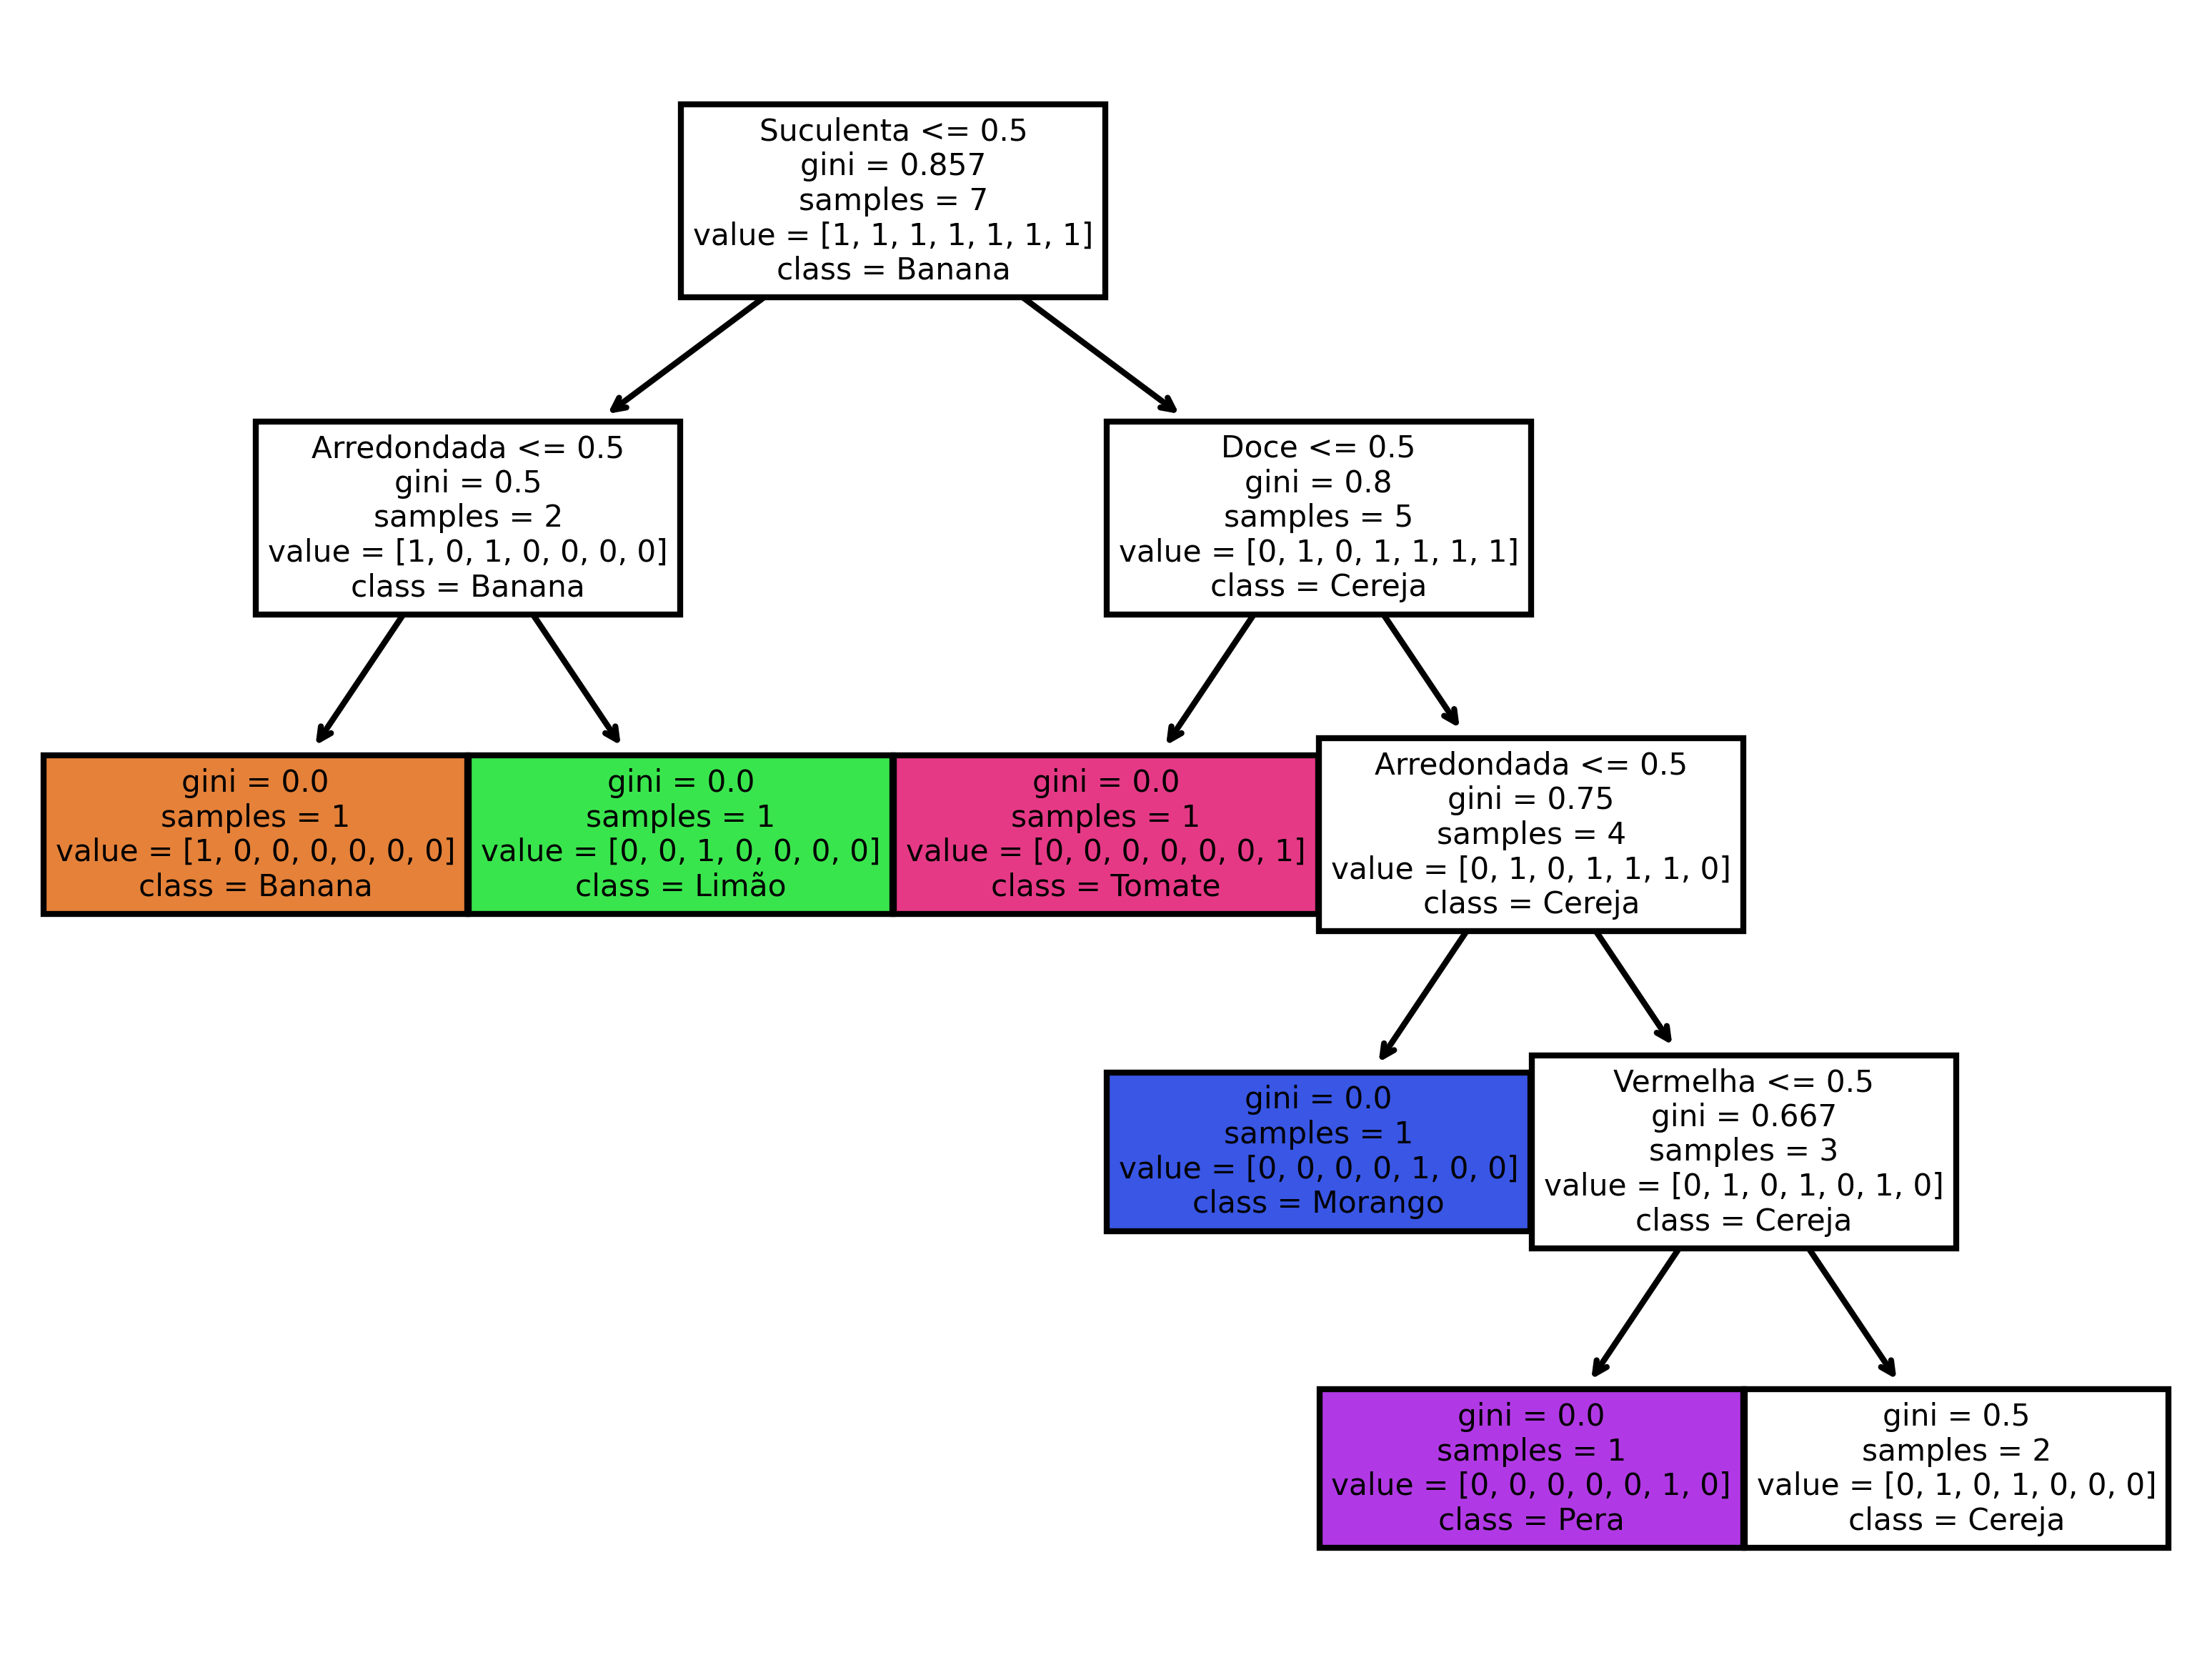

In [6]:
import matplotlib.pyplot as plt

plt.figure(dpi=600)

tree.plot_tree(arvore, class_names=arvore.classes_, feature_names=features, filled=True)

In [8]:
# ["Arredondada", "Suculenta", "Vermelha", "Doce"] 
arvore.predict([[0, 1, 1, 1]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Morango'], dtype=object)

In [16]:
#arvore.predict_proba([[0, 1, 1, 1]])            #Lista com a probabilidade de cada fruta

# Ou
probas = arvore.predict_proba([[1, 1, 1, 1]])[0]
pd.Series(probas, index=arvore.classes_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Banana     0.0
Cereja     0.5
Limão      0.0
Maçã       0.5
Morango    0.0
Pera       0.0
Tomate     0.0
dtype: float64